# Import libraries and load dataset
# ● Exploratory Data Analysis :
#    ○ Including univariate analysis to understand the distribution of features.
#    ○ Including multivariate analysis to determine the correlations and analysisof target variables.
#    ○ To determine if new features can be created, based on the given data.
# ● Layout binary classification experimentation space (i.e. determine the list of models you would like to experiment with)
# ● Using techniques such as oversampling, undersampling to handleclass-imbalance.
# ● Using precision-recall curves to determine best threshold
# ● Publish the performance of all the models on the same hold-out/ test dataset.
# ● List out the most important drivers of heart disease or attack.
# ● Additional: Using model pipeline to create end to end training and
# inferencepipelines


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve, classification_report

In [6]:
# Import libraries and load dataset

data  = pd.read_csv("heart_disease.csv")
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
data.duplicated().sum()

23899

In [14]:
data.size

5580960

In [16]:
data.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [18]:
data.shape

(253680, 22)

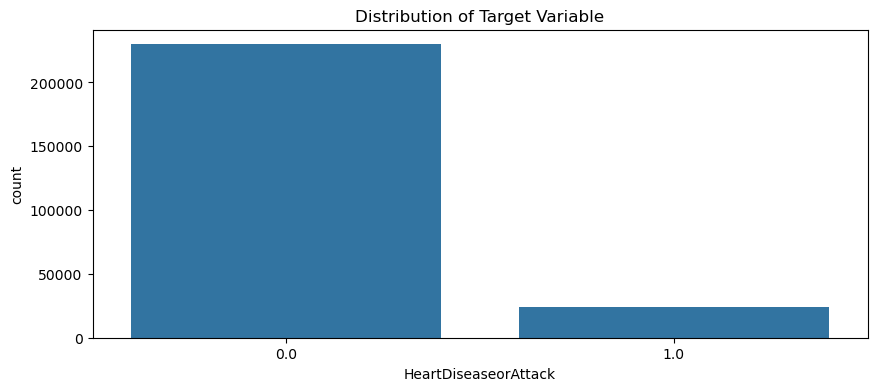

In [20]:
# ● Exploratory Data Analysis :
#    ○ Including univariate analysis to understand the distribution of features.

plt.figure(figsize=(10,4))
sns.countplot(x = "HeartDiseaseorAttack", data = data)
plt.title("Distribution of Target Variable")
plt.show()

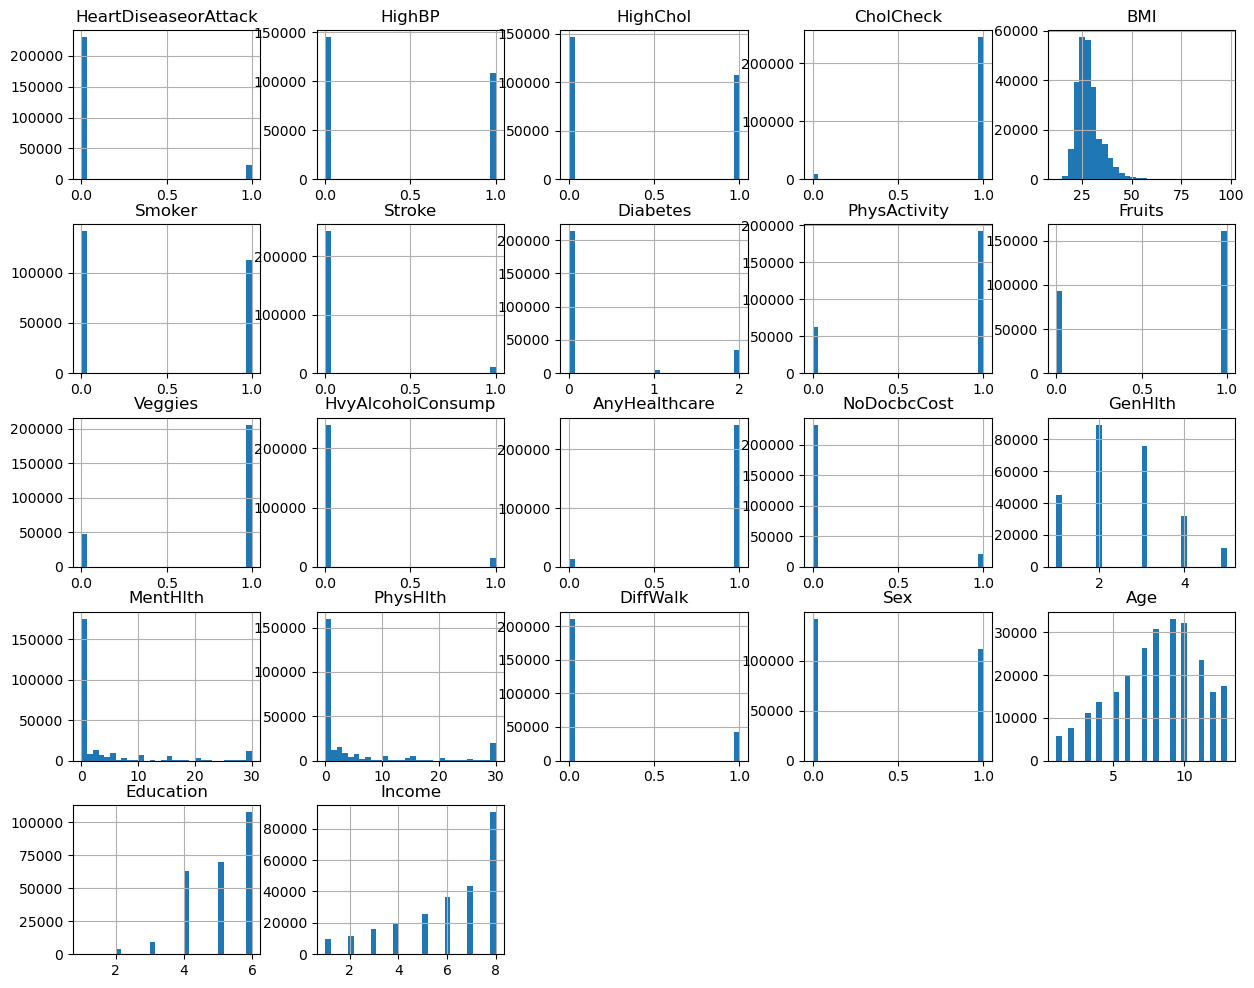

In [21]:
data.hist(bins = 30 , figsize= (15,12))
plt.show()


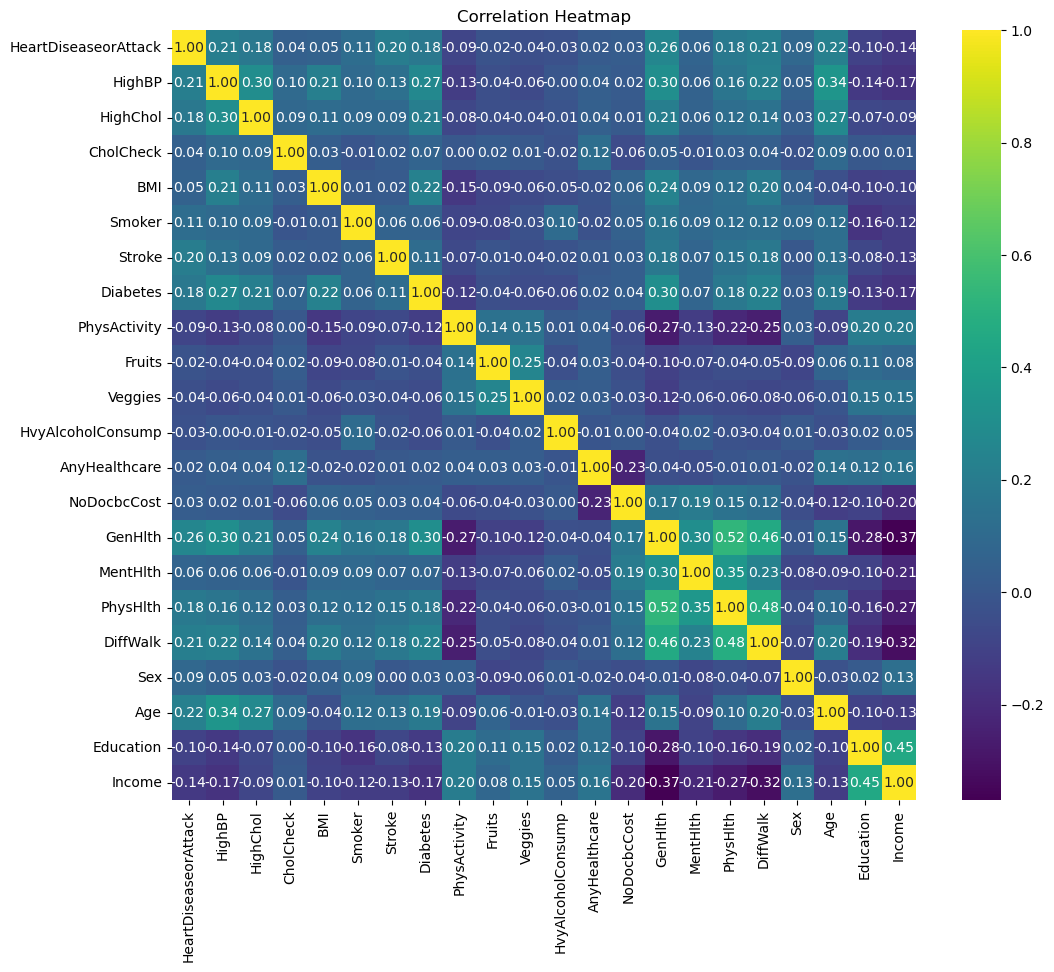

In [32]:
# Including multivariate analysis to determine the correlations and analysis of target variables.

plt.figure(figsize=(12, 10))
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True,cmap = "viridis", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [34]:
# To determine if new features can be created, based on the given data.

data["Health_Wellness"] = np.where((data["PhysActivity"] == 1) & (data["Fruits"] == 1) & (data["Veggies"] == 1),1,0)

In [36]:
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Health_Wellness
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,0


In [38]:
x = data.drop("HeartDiseaseorAttack", axis = 1)
y = data["HeartDiseaseorAttack"]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2 , random_state = 10)

In [42]:
x_train.shape

(202944, 22)

In [44]:
x_test.shape

(50736, 22)

In [46]:
y_train.shape

(202944,)

In [48]:
y_test.shape

(50736,)

In [50]:
# Layout binary classification experimentation space (i.e. determine the list of models you would like to experiment with)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [52]:
# Using techniques such as oversampling, undersampling to handleclass-imbalance.

oversample = SMOTE()
undersample = RandomUnderSampler()

pipeline = Pipeline(steps=[('oversample', SMOTE()), ('classifier', LogisticRegression())])

pipeline.fit(x_train,y_train)


E:\AnacondaPython\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('oversample', SMOTE()), ('classifier', LogisticRegression())])

In [54]:
# Using precision-recall curves to determine best threshold

y_pred_prob = pipeline.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

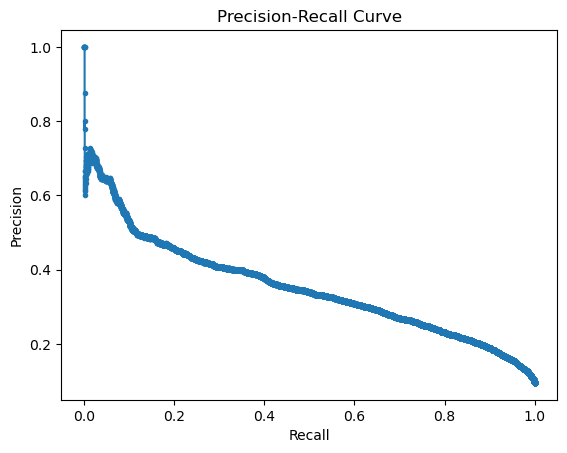

In [56]:
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [58]:
optimal_threshold = thresholds[np.argmax(precision[:-1] - recall[:-1])]
print(f'Optimal threshold: {optimal_threshold}')

Optimal threshold: 0.9961630241030015


In [60]:
# Publish the performance of all the models on the same hold-out/ test dataset.

clf = Pipeline(steps=[('oversample', SMOTE()), ('classifier', RandomForestClassifier())])
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(f'{RandomForestClassifier} Classification Report:')
print(classification_report(y_test, y_pred))

<class 'sklearn.ensemble._forest.RandomForestClassifier'> Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     45905
         1.0       0.41      0.13      0.20      4831

    accuracy                           0.90     50736
   macro avg       0.66      0.56      0.57     50736
weighted avg       0.87      0.90      0.88     50736



In [61]:
clf = Pipeline(steps=[('oversample', SMOTE()), ('classifier', DecisionTreeClassifier())])
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(f'{DecisionTreeClassifier} Classification Report:')
print(classification_report(y_test, y_pred))

<class 'sklearn.tree._classes.DecisionTreeClassifier'> Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     45905
         1.0       0.25      0.28      0.26      4831

    accuracy                           0.85     50736
   macro avg       0.58      0.59      0.59     50736
weighted avg       0.86      0.85      0.85     50736



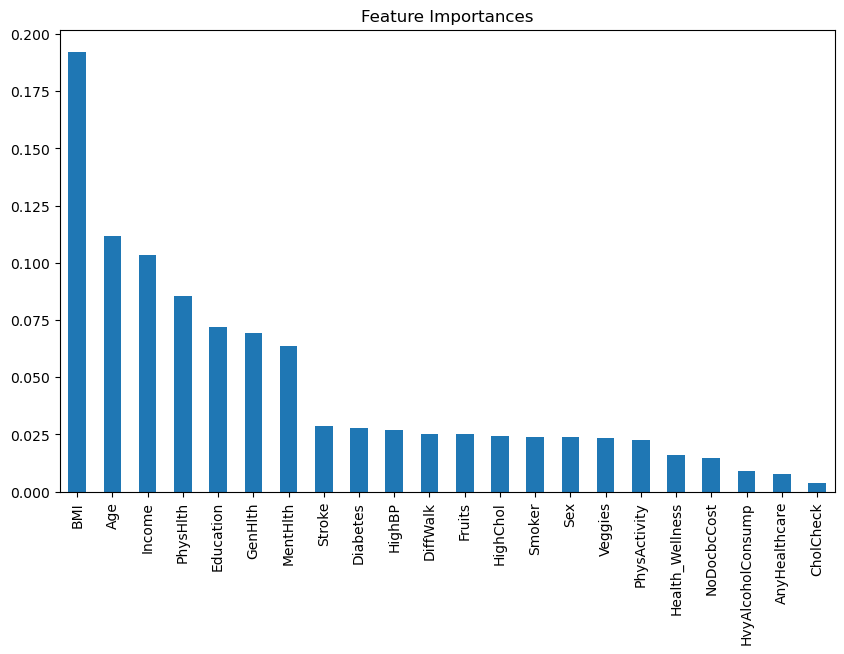

In [62]:
# List out the most important drivers of heart disease or attack.

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()